In [7]:
import pandas as pd
import struct

# Define the file path
file_path = 'ptb-diagnostic-ecg-database-1.0.0/ptb-diagnostic-ecg-database-1.0.0/patient001/s0010_re.dat'

# Initialize an empty list to store the binary data
binary_data = []

# Read the binary data from the file
with open(file_path, 'rb') as file:
    # Assuming each value in the binary data is a 16-bit integer
    while True:
        # Read 2 bytes (16 bits) from the file as a binary integer
        binary_int = file.read(2)
        if not binary_int:
            break  # End of file reached
        # Unpack the binary data as a little-endian short integer
        value = struct.unpack('<h', binary_int)[0]
        # Append the value to the list
        binary_data.append(value)

# Create a DataFrame from the binary data
df = pd.DataFrame({'ECG_Data': binary_data})

# Display the DataFrame
print(df)



        ECG_Data
0           -489
1           -458
2             31
3            474
4           -260
...          ...
460795       164
460796       118
460797      -168
460798      -249
460799      -333

[460800 rows x 1 columns]


Text(0.5, 0, 'Samples (1000 Hz)')

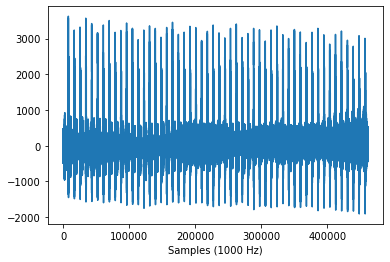

In [8]:
import matplotlib.pyplot as plt

plt.plot(df['ECG_Data'])
#1000 samples every second, 460800 samples --> 460.8 seconds 
plt.xlabel('Samples (1000 Hz)')

In [9]:
#does not look like one minute
#simultaneoulsy measured signals but when reduce only see one line?

In [10]:
import struct
import pandas as pd
import numpy as np

# Define a single file path for all channels
file_path = 'ptb-diagnostic-ecg-database-1.0.0/ptb-diagnostic-ecg-database-1.0.0/patient001/s0010_re.dat'

lead_names = ["i", "ii", "iii", "avr", "avl", "avf", "v1", "v2", "v3", "v4", "v5", "v6"]

# Initialize a list to store data DataFrames
lead_dataframes = []

# Loop through the lead names and create DataFrames
for lead_name in lead_names:
    with open(file_path, 'rb') as f:
        data = f.read(2)  # Read 2 bytes (16 bits) at a time
        lead_data = []

        while data:
            value = struct.unpack('<h', data)[0]  # Interpret as a 16-bit signed integer
            lead_data.append(value / 2000)  # Convert to mV
            data = f.read(2)

        lead_df = pd.DataFrame(lead_data, columns=[lead_name])
        lead_dataframes.append(lead_df)

# Concatenate the lead DataFrames into one DataFrame
ecg_dataframe = pd.concat(lead_dataframes, axis=1)

# Generate timestamps based on the sampling rate
sampling_rate = 1000  # 1000 Hz
total_samples = len(lead_dataframes[0])
time_values = np.arange(0, total_samples) / sampling_rate

# Add timestamps as an index in the DataFrame
ecg_dataframe["Time (s)"] = time_values

In [11]:
# Define the sample where the "v1" to "v6" channels become relevant
  # Adjust this value as needed based on your data
dt = 38400

# Initialize an empty dictionary to store the DataFrames for each channel
v_channel_dataframes = {}

# Loop through the channel names "v1" to "v6" and create a DataFrame for each
for i, channel_name in enumerate(["i", "ii", "iii", "avr", "avl", "avf", "v1", "v2", "v3", "v4", "v5", "v6"]):
    # Select the corresponding channel and create a new DataFrame
    selected_channel_df = ecg_dataframe[channel_name].iloc[i*dt:(i+1)*dt]
    
    # Store the DataFrame in the dictionary with the channel name as the key
    v_channel_dataframes[channel_name] = selected_channel_df
    




NameError: name 'v_start_sample' is not defined

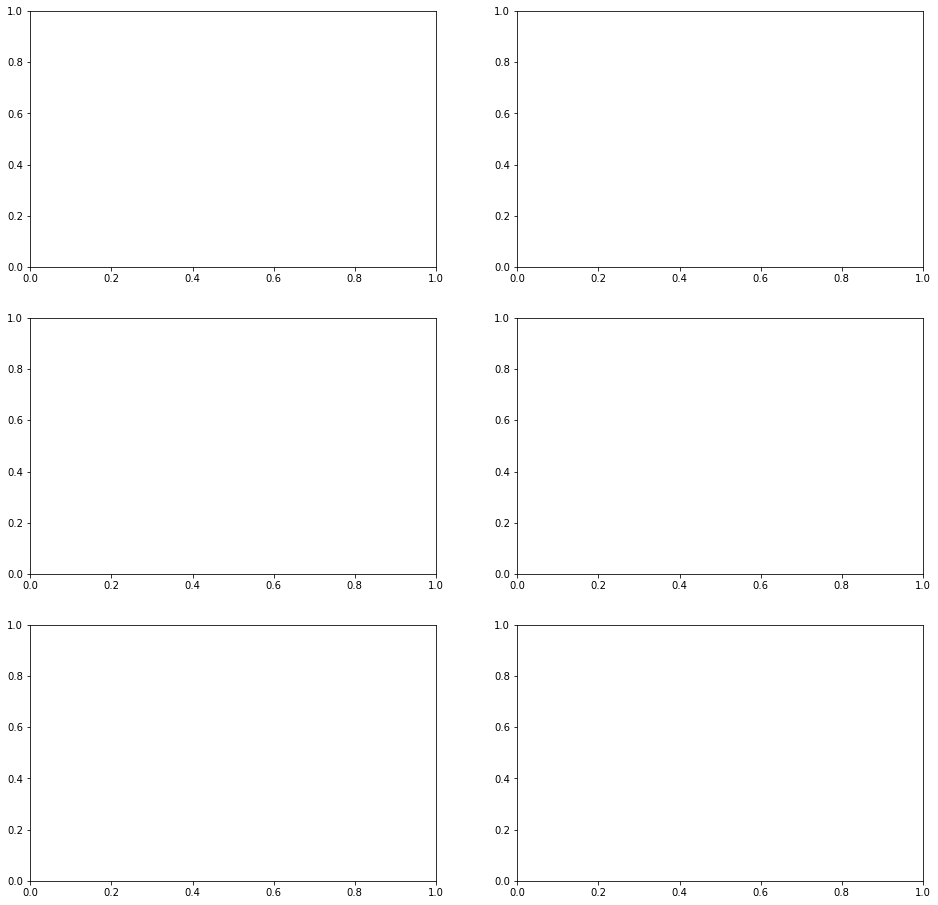

In [12]:
fig1, axes = plt.subplots(3, 2, figsize = (16, 16))
axes[0,0].plot(ecg_dataframe["Time (s)"].iloc[v_start_sample:v_start_sample+dt], v_channel_dataframes["v1"])
axes[0,0].set_title("v1")
axes[0,0].set_xlabel('Times (s)')
axes[0,0].set_ylabel('V')
axes[1,0].plot(v_channel_dataframes["v3"])
axes[1,0].set_title("v3")
axes[1,0].set_xlabel('sample')
axes[1,0].set_ylabel('V')
axes[2,0].plot(v_channel_dataframes["v5"])
axes[2,0].set_title("v5")
axes[2,0].set_xlabel('sample')
axes[2,0].set_ylabel('V')
axes[0,1].plot(v_channel_dataframes["v2"])
axes[0,1].set_title("v2")
axes[0,1].set_xlabel('sample')
axes[0,1].set_ylabel('V')
axes[1,1].plot(v_channel_dataframes["v4"])
axes[1,1].set_title("v4")
axes[1,1].set_xlabel('sample')
axes[1,1].set_ylabel('V')
axes[2,1].plot(v_channel_dataframes["v6"])
axes[2,1].set_title("v6")
axes[2,1].set_xlabel('sample')
axes[2,1].set_ylabel('V')
fig1.tight_layout()

In [ ]:
#conversion factor 2000 adu/mV
#some sort of transform???

In [ ]:
from scipy.signal import butter, filtfilt

# Define the sampling frequency and cutoff frequency for the filter
fs = 1000  # Sampling frequency in Hz
#cutoff_frequency = 40  # Cutoff frequency in Hz
cutoff_frequency1 = 0.5
v_start_sample = 230400

# Design a Butterworth low-pass filter
order = 2  # Filter order
b, a = butter(order, cutoff_frequency1 / (0.5 * fs), btype='lowpass', analog=False)
#b, a = butter(order, cutoff_frequency1, btype='highpass', analog=False, fs = fs)?????


# Apply the filter to the "v1" channel
v1_filtered = filtfilt(b, a, v_channel_dataframes["v1"])

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(ecg_dataframe["Time (s)"].iloc[v_start_sample:v_start_sample+dt], v_channel_dataframes["v1"], label="Original v1")
plt.plot(ecg_dataframe["Time (s)"].iloc[v_start_sample:v_start_sample+dt], v1_filtered, label="Filtered v1")
plt.title("Original vs Filtered v1")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (V)")
plt.legend()
plt.show()

In [ ]:
#do this for 3 random patients for all 6 channels - automate process see if is acc gonna work or not.